<a href="https://colab.research.google.com/github/waltz2u/web/blob/master/Web_Scraping_from_XML%2C_JSON%2C_and_HTML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install altair 

## Read data from Web (XML)

In [0]:
!pip install lxml

Import needed libs

In [0]:
import urllib.request
from lxml import etree

Send a request to Treasury website to get data. Replace "2017" int the URL parameter for a different year

In [0]:
xml = urllib.request.urlopen('http://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%202017').read()
tree = etree.fromstring(xml)

Find nodes using XPath

In [0]:
new_date = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}NEW_DATE")
tbill3month = tree.findall(".//{http://schemas.microsoft.com/ado/2007/08/dataservices}BC_3MONTH")

In [0]:
len(tbill3month)

251

In [0]:
tbill3month[12].text

'0.5'

In [0]:
for i in range(10):
  print(tbill3month[i].text)

0.53
0.53
0.52
0.53
0.5
0.52
0.52
0.52
0.53
0.55


In [0]:
import pandas as pd
# list comprehension
tbill3month_df = pd.DataFrame([float(rate.text) for rate in tbill3month], columns=['3 Month'])
tbill3month_df.head()

,3 Month
0,0.53
1,0.53
2,0.52
3,0.53
4,0.50


In [0]:
new_date[1].text

'2017-01-04T00:00:00'

In [0]:
# list comprehension
date_df = pd.DataFrame([d.text[:10] for d in new_date], columns=['Date'])
date_df.head()

,Date
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09


In [0]:
full_df = pd.concat([date_df, tbill3month_df], axis = 1)
full_df.head()

,Date,3 Month
0,2017-01-03,0.53
1,2017-01-04,0.53
2,2017-01-05,0.52
3,2017-01-06,0.53
4,2017-01-09,0.50


## Read data from Web (JSON)

In [0]:
import json

In [0]:
stocks = urllib.request.urlopen('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=demo')
data = json.load(stocks)

Can see that this is a dictionary. A value can also be a dictionary.

In [0]:
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'MSFT',
  '3. Last Refreshed': '2020-02-14',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2020-02-14': {'1. open': '183.2500',
   '2. high': '185.4100',
   '3. low': '182.6500',
   '4. close': '185.3500',
   '5. volume': '23149516'},
  '2020-02-13': {'1. open': '183.0800',
   '2. high': '186.2300',
   '3. low': '182.8720',
   '4. close': '183.7100',
   '5. volume': '35295834'},
  '2020-02-12': {'1. open': '185.5800',
   '2. high': '185.8500',
   '3. low': '181.8500',
   '4. close': '184.7100',
   '5. volume': '47062921'},
  '2020-02-11': {'1. open': '190.6500',
   '2. high': '190.7000',
   '3. low': '183.5000',
   '4. close': '184.4400',
   '5. volume': '53159906'},
  '2020-02-10': {'1. open': '183.5800',
   '2. high': '188.8400',
   '3. low': '183.2500',
   '4. close': '188.7000',
   '5. volume': '35844267'},
  '2020-02-07': {'1. open': '1

Can get the symbol via its key.

In [0]:
data['Meta Data']['2. Symbol']

'MSFT'

In [0]:
data['Time Series (Daily)']['2020-02-14']

{'1. open': '183.2500',
 '2. high': '185.4100',
 '3. low': '182.6500',
 '4. close': '185.3500',
 '5. volume': '23149516'}

How many days in the series?

In [0]:
len(data['Time Series (Daily)'])

5033

Create a DataFrame for dates

In [0]:
import pandas as pd
# list comprehension
date_df = pd.DataFrame([day for day in data['Time Series (Daily)']], columns=['Date'])
date_df.head()

,Date
0,2020-02-14
1,2020-02-13
2,2020-02-12
3,2020-02-11
4,2020-02-10


Create a dataframe for price

In [0]:
import pandas as pd
# list comprehension
open_df = pd.DataFrame([data['Time Series (Daily)'][day]['1. open'] for day in data['Time Series (Daily)']], columns=['Open Price'])
open_df.head()

,Open Price
0,183.2500
1,183.0800
2,185.5800
3,190.6500
4,183.5800


In [0]:
full_price_df = pd.concat([date_df, open_df], axis = 1)
full_price_df.head()

,Date,Open Price
0,2020-02-14,183.2500
1,2020-02-13,183.0800
2,2020-02-12,185.5800
3,2020-02-11,190.6500
4,2020-02-10,183.5800


We use altair instead of matplotlib for plots. Can only show < 5000 points so here use head() to reduce the number of points to plot; or disble max rows

In [0]:
import altair as alt
alt.data_transformers.disable_max_rows()
alt.Chart(full_price_df.head(20)).mark_line().encode(x='Date', y='Open Price')

alt.Chart(...)

bin: It is set TRUE to discretized a continuous feature, in order to produce a bar plot.
count: It is a data transformation parameter, which is provided by Altair in order to customize our plots. We can also use other parameters like max, min, average, etc.
Q: Here, Q denotes that the count will a quantitative feature. We can also use N for nominal data or O for ordinal data.

In [0]:
# https://altair-viz.github.io/user_guide/transform/timeunit.html
import altair as alt
alt.Chart(full_price_df).mark_line().encode(x='month(Date):T', y='mean(Open Price):Q')

alt.Chart(...)

## Read data from Web (HTML)

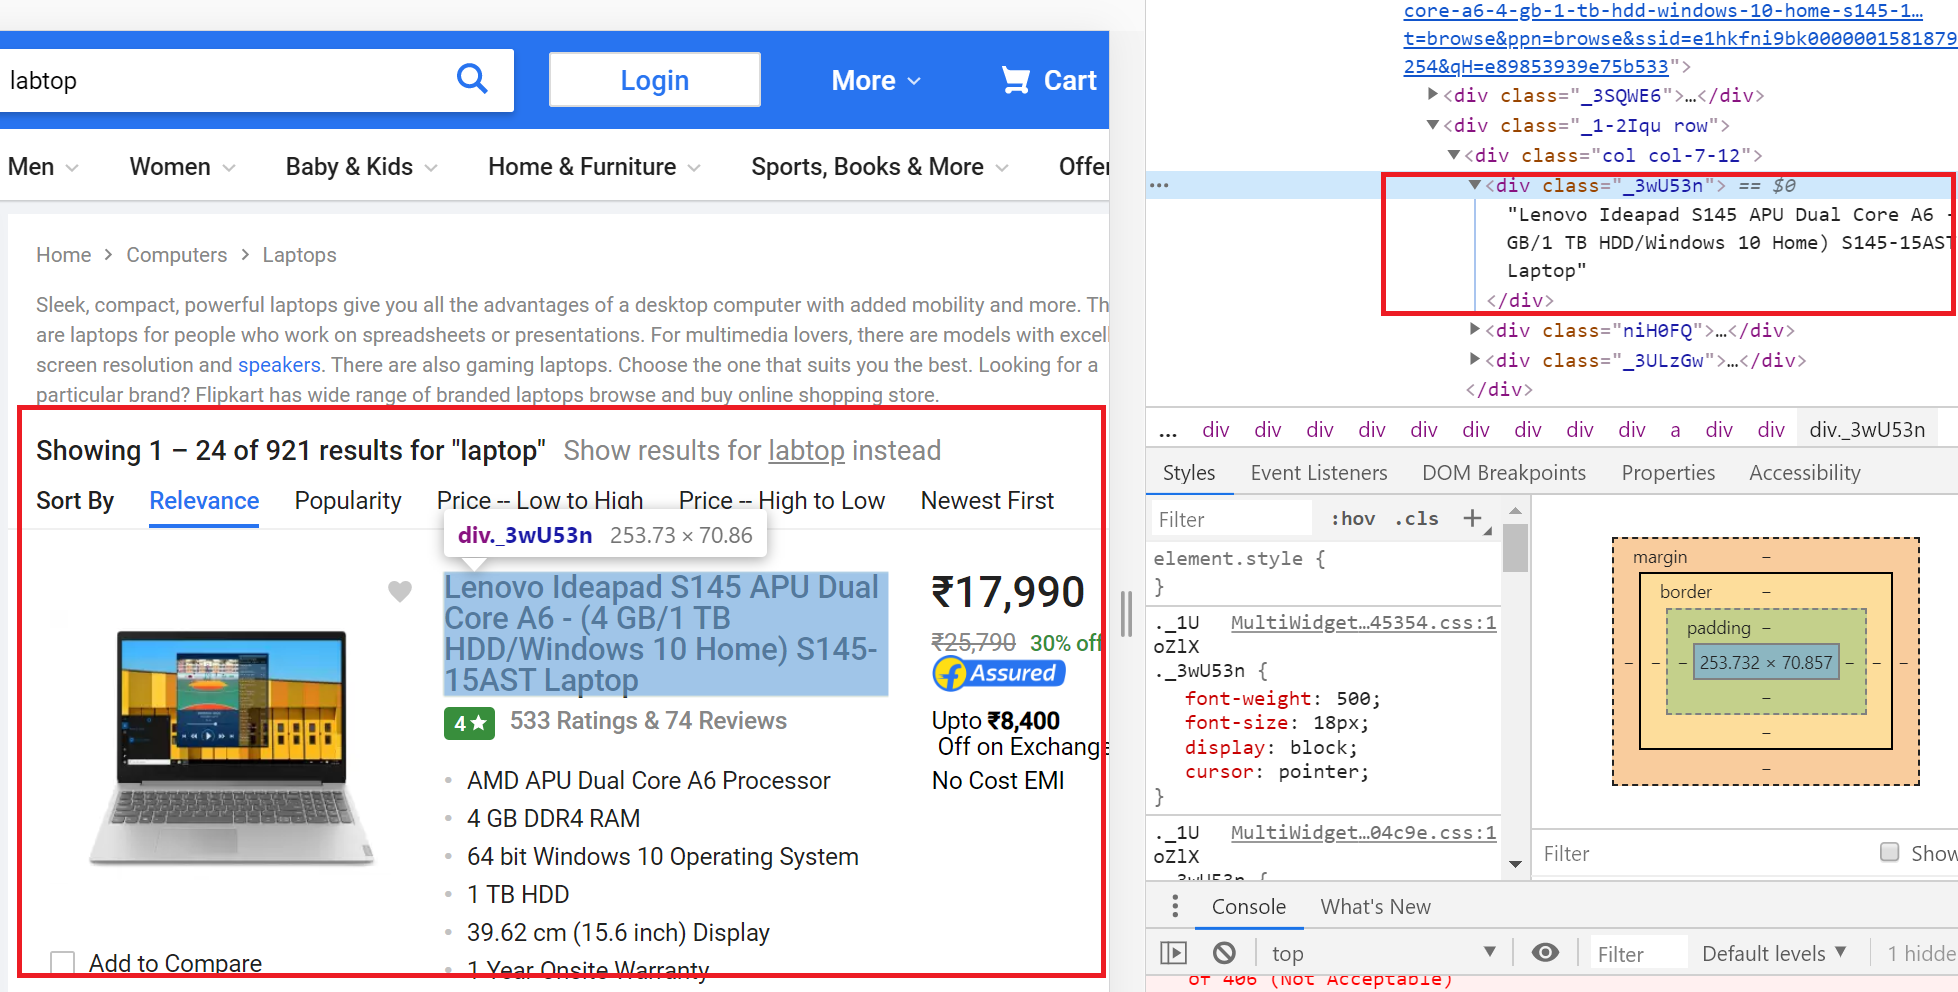

In [0]:
import urllib.request
from lxml import html

html_data = urllib.request.urlopen('https://www.flipkart.com/computers/laptops/pr?sid=6bo,b5g&q=labtop&otracker=categorytree').read()

In [0]:
html_tree = html.fromstring(html_data)

In [116]:
name = html_tree.xpath("//div[@class='_3wU53n']/text()")
name_df = pd.DataFrame(name, columns = ['Laptop names'])
name_df.head()

,Laptop names
0,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...
1,Acer Swift 3 Core i5 8th Gen - (8 GB/512 GB SS...
2,HP 14q APU Dual Core A9 - (4 GB/256 GB SSD/Win...
3,Lenovo Ideapad 130 Core i3 7th Gen - (4 GB/1 T...
4,HP 15q APU Dual Core A9 - (4 GB/1 TB HDD/Windo...


In [117]:
price = html_tree.xpath("//div[@class='_1vC4OE _2rQ-NK']/text()")
price_df = pd.DataFrame(price, columns = ['Laptop Price'])
price_df.head()

,Laptop Price
0,"₹41,990"
1,"₹47,990"
2,"₹19,990"
3,"₹25,990"
4,"₹22,691"


In [0]:
full_laptop_price_df = pd.concat([name_df, price_df], axis = 1)
full_laptop_price_df.head()

,Laptop names,Laptop Price
0,Lenovo Ideapad S145 APU Dual Core A6 - (4 GB/1...,"₹17,990"
1,HP 15 Core i3 7th Gen - (8 GB/1 TB HDD/Windows...,"₹32,290"
2,HP 14q APU Dual Core A9 - (4 GB/256 GB SSD/Win...,"₹19,990"
3,HP 15q APU Dual Core A9 - (4 GB/1 TB HDD/Windo...,"₹22,990"
4,Lenovo Ideapad 130 Core i3 7th Gen - (4 GB/1 T...,"₹25,990"


There are 24 products on the page

In [0]:
desc = html_tree.xpath("(//div[@class='_3ULzGw']/ul)")
len(desc)

24

There are 11 lines in the description of the first product

In [0]:
print(len(desc[0]))

11


Get just 1 first product

In [102]:
desc = html_tree.xpath("(//div[@class='_3ULzGw']/ul)[1]")
len(desc)

1

Print all the description text in li tags under ul for the product

In [0]:
desc = html_tree.xpath("string((//div[@class='_3ULzGw']/ul)[1])")
print(desc)

Durable Metallic Chassis with a QuickSilver Finish16.5mm Thin and 1.26 Kg Light8th Gen Intel Core i5 for superior computing8GB RAM & 256GB SSD for superfast computingDedicated SSD slot for upto 1TB expandable StorageIntel Core i5 Processor (8th Gen)8 GB LPDDR3 RAM64 bit Windows 10 Operating System256 GB SSD33.78 cm (13.3 inch) Display1 Year Onsite Warranty Commencing from the Date of Purchase


In [111]:
products = html_tree.xpath("//div[@class='_3ULzGw']/ul")
description = []
for i in range(1, len(products) + 1):
  desc = html_tree.xpath("string((//div[@class='_3ULzGw']/ul)[" + str(i) + "])")
  description.append(desc)

print(description)

['Durable Metallic Chassis with a QuickSilver Finish16.5mm Thin and 1.26 Kg Light8th Gen Intel Core i5 for superior computing8GB RAM & 256GB SSD for superfast computingDedicated SSD slot for upto 1TB expandable StorageIntel Core i5 Processor (8th Gen)8 GB LPDDR3 RAM64 bit Windows 10 Operating System256 GB SSD33.78 cm (13.3 inch) Display1 Year Onsite Warranty Commencing from the Date of Purchase', 'Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD35.56 cm (14 inch) Display1 Year International Travelers Warranty (ITW)', 'Fast Performance (Upto 30% Faster than HDD Storage)Upto 75% Reduction in System Boot Up TimeMore Energy EfficientNo Vibrations or NoiseAMD APU Dual Core A9 Processor4 GB DDR4 RAM64 bit Windows 10 Operating System256 GB SSD35.56 cm (14 inch) Display1 Year Onsite Warranty', 'Intel Core i3 Processor (7th Gen)4 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD39.62 cm (15.6 inch) Display1 Year Onsite Warranty', 'AMD APU Dual Core 

In [112]:
print(len(description))

24


In [113]:
print(description[1])

Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD35.56 cm (14 inch) Display1 Year International Travelers Warranty (ITW)


In [114]:
len(products)

24

In [118]:
desc_df = pd.DataFrame(description, columns = ['Laptop descriptions'])
desc_df.head()

,Laptop descriptions
0,Durable Metallic Chassis with a QuickSilver Fi...
1,Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...
2,Fast Performance (Upto 30% Faster than HDD Sto...
3,Intel Core i3 Processor (7th Gen)4 GB DDR4 RAM...
4,AMD APU Dual Core A9 Processor4 GB DDR4 RAM64 ...


In [119]:
full_laptop_price_df = pd.concat([name_df, price_df, desc_df], axis = 1)
full_laptop_price_df.head()

,Laptop names,Laptop Price,Laptop descriptions
0,MarQ by Flipkart Falkon Aerbook Core i5 8th Ge...,"₹41,990",Durable Metallic Chassis with a QuickSilver Fi...
1,Acer Swift 3 Core i5 8th Gen - (8 GB/512 GB SS...,"₹47,990",Intel Core i5 Processor (8th Gen)8 GB DDR4 RAM...
2,HP 14q APU Dual Core A9 - (4 GB/256 GB SSD/Win...,"₹19,990",Fast Performance (Upto 30% Faster than HDD Sto...
3,Lenovo Ideapad 130 Core i3 7th Gen - (4 GB/1 T...,"₹25,990",Intel Core i3 Processor (7th Gen)4 GB DDR4 RAM...
4,HP 15q APU Dual Core A9 - (4 GB/1 TB HDD/Windo...,"₹22,691",AMD APU Dual Core A9 Processor4 GB DDR4 RAM64 ...
